In [1]:
from glob import glob
import pandas as pd
import numpy as np
from scipy import stats  
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
files = glob("../csv/例題_データアナリティクス基礎/*")
for i, f in enumerate(files):
    print(i, f)


0 ../csv/例題_データアナリティクス基礎\例題10_自由記述データ&形態素解析データ.xlsx
1 ../csv/例題_データアナリティクス基礎\例題11_乱数で発生させた分布の基本統計量.xlsx
2 ../csv/例題_データアナリティクス基礎\例題1_自転車データ.xlsx
3 ../csv/例題_データアナリティクス基礎\例題2_顧客ID付き食品購入データ.xlsx
4 ../csv/例題_データアナリティクス基礎\例題3_テレビ視聴アンケートデータ.xlsx
5 ../csv/例題_データアナリティクス基礎\例題4_5つの地域の事業所数.xlsx
6 ../csv/例題_データアナリティクス基礎\例題5_関東地方の人口データ.xlsx
7 ../csv/例題_データアナリティクス基礎\例題7_異なる授業形態による成績データ.xlsx
8 ../csv/例題_データアナリティクス基礎\例題8_遊園地テーマパーク入場者数.xlsx
9 ../csv/例題_データアナリティクス基礎\例題9_店舗別販売額.xlsx


In [3]:
df = pd.read_excel(files[1])
print(df.columns)
df.columns = ['A', 'valueA', 'B', 'valueB', 'C', 'valueC', 'D', 'valueD', 'E', 'valueE']
df

Index(['A', 'Unnamed: 1', 'B', 'Unnamed: 3', 'C', 'Unnamed: 5', 'D',
       'Unnamed: 7', 'E', 'Unnamed: 9'],
      dtype='object')


,A,valueA,B,valueB,C,valueC,D,valueD,E,valueE
0,平均,5.004335,平均,3.525185,平均,5.019000,平均,0.796000,平均,5.016000
1,標準誤差,0.032131,標準誤差,0.044921,標準誤差,0.049346,標準誤差,0.012749,標準誤差,0.070942
2,中央値 （メジアン）,5.025668,中央値 （メジアン）,3.485580,中央値 （メジアン）,5.000000,中央値 （メジアン）,1.000000,中央値 （メジアン）,5.000000
3,最頻値 （モード）,5.435965,最頻値 （モード）,5.170354,最頻値 （モード）,5.000000,最頻値 （モード）,1.000000,最頻値 （モード）,5.000000
4,標準偏差,1.016064,標準偏差,1.420526,標準偏差,1.560472,標準偏差,0.403171,標準偏差,2.243385
5,分散,1.032385,分散,2.017895,分散,2.435074,分散,0.162547,分散,5.032777
6,尖度,0.218511,尖度,-1.195208,尖度,-0.158274,尖度,0.165060,尖度,0.186714
7,歪度,-0.042199,歪度,-0.030540,歪度,0.020677,歪度,-1.471304,歪度,0.401068
8,範囲,7.465133,範囲,4.994507,範囲,10.000000,範囲,1.000000,範囲,14.000000
9,最小,0.990656,最小,1.002289,最小,0.000000,最小,0.000000,最小,0.000000


モンテカルロシミュレーション

793


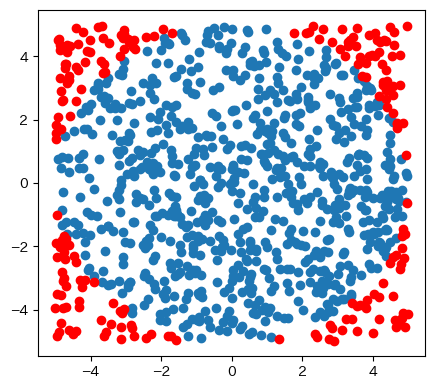

In [4]:
n = 1000
r = 5

rng = np.random.default_rng()
data = pd.DataFrame(rng.uniform(-r, r, (n, 2)))

data['square_mean'] = np.sqrt(data[0]**2 + data[1]**2)
inside_circle = data.query(f'square_mean <= {r}')
outside_circle = data.query(f'square_mean > {r}')
print(inside_circle.count()['square_mean'])

plt.figure(figsize=(5, 4.5))
plt.scatter(inside_circle[0], inside_circle[1])
plt.scatter(outside_circle[0], outside_circle[1], color='r')
plt.show()

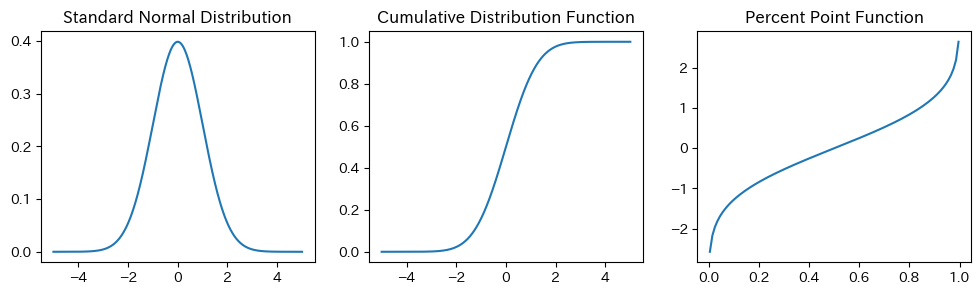

In [46]:
# 正規分布の分布関数
x = np.linspace(-5, 5, 1000)
norm = {
    'Standard Normal Distribution': stats.norm.pdf(x),
    'Cumulative Distribution Function': stats.norm.cdf(x),
    'Percent Point Function': stats.norm.ppf(x),
    }

fig, axs = plt.subplots(1, 3, figsize=(12, 3))
for ax, (k, y) in zip(axs, norm.items()):
    ax.plot(x, y)
    ax.set_title(k)
plt.show()

In [45]:
# alpha を変化させたときの Z 値
alpha_list = np.array([0.1, 0.05, 0.01])

for alpha in alpha_list:
    tmp = np.array([alpha/2, 1-(alpha/2)])
    y = stats.norm.ppf(tmp)
    print(f'alpha={alpha} : 両側のZ値 {y}')

alpha=0.1 : 両側のZ値 [-1.64485363  1.64485363]
alpha=0.05 : 両側のZ値 [-1.95996398  1.95996398]
alpha=0.01 : 両側のZ値 [-2.5758293  2.5758293]


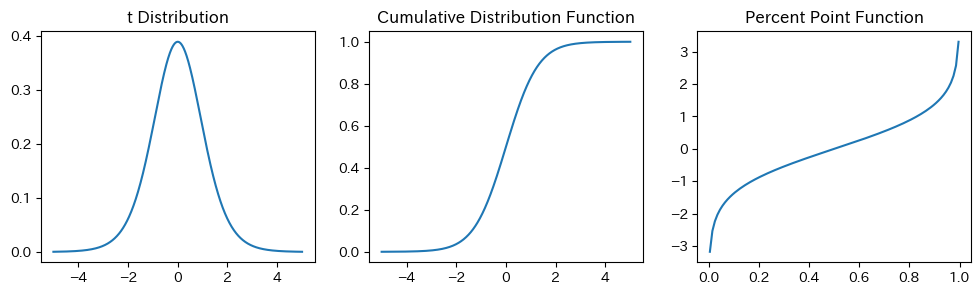

In [52]:
# t 分布の分布関数
x = np.linspace(-5, 5, 1000)
dof = 10
t = {
    't Distribution': stats.t.pdf(x, df=dof),
    'Cumulative Distribution Function': stats.t.cdf(x, df=dof),
    'Percent Point Function': stats.t.ppf(x, df=dof),
    }

fig, axs = plt.subplots(1, 3, figsize=(12, 3))
for ax, (k, y) in zip(axs, t.items()):
    ax.plot(x, y)
    ax.set_title(k)
plt.show()

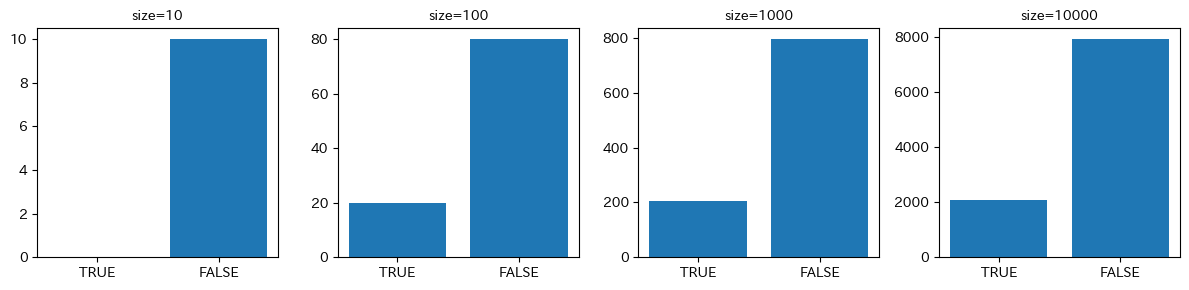

In [124]:
# bernouli 分布
p = 0.2
size_list = [10**(i+1) for i in range(4)]
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
for ax, size in zip(axs, size_list):
    b = stats.bernoulli.rvs(p, size=size)
    true = np.count_nonzero(b)
    false = size - true
    ax.bar(['TRUE', 'FALSE'], [true, false])
    ax.set_title(f'size={size}', fontsize=10)
plt.tight_layout()

乱数の発生

In [316]:
rng = np.random.default_rng(10)
# 一様分布
print(rng.uniform(low=-3, high=3, size=10))
# 標準正規分布
print(rng.standard_normal(size=10))
# 平均分散指定正規分布
print(rng.normal(loc=0, scale=1, size=10))
# ベルヌーイ分布
print(rng.binomial(n=1, p=0.2, size=10))
# 二項分布
print(rng.binomial(n=10, p=0.2, size=10))
# ポアソン分布
print(rng.poisson(lam=1, size=10))


[ 2.73601026 -1.75390914  1.97066931 -2.10430726  0.0768277  -2.18448238
  1.13421888  2.05048635 -0.44694602  2.74155602]
[-0.75493228 -0.81481411 -0.34385486 -0.05138009 -0.97227368 -1.13448753
  0.30570522 -1.85168503 -0.17705351  0.42582567]
[-0.98535561 -1.11295413 -0.76062603  0.64802459 -0.12983136 -1.86959723
 -0.42334911  1.0138968   0.98371534  0.63004195]
[0 0 1 0 0 0 0 0 0 0]
[3 3 1 1 2 2 2 1 2 1]
[0 5 2 0 1 2 1 1 0 0]


各乱数分布 numpy

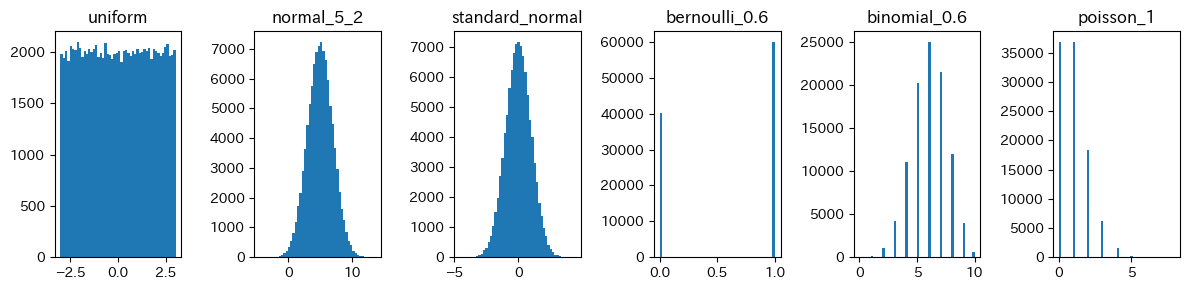

In [319]:
n = 100000
p = 0.6
lam = 1
rng = np.random.default_rng()
dist_list = {
    'uniform': rng.uniform(low=-3, high=3, size=n),
    f'normal_5_2': rng.normal(loc=5, scale=2, size=n),
    'standard_normal': rng.standard_normal(size=n),
    f'bernoulli_{p}': rng.binomial(n=1, p=p, size=n),
    f'binomial_{p}': rng.binomial(n=10, p=p, size=n),
    f'poisson_{lam}': rng.poisson(lam=lam, size=n),   
}

fig, axs = plt.subplots(1, 6, figsize=(12, 3))
for ax, (name, dist) in zip(axs, dist_list.items()):
    ax.hist(dist, bins=50)
    ax.set_title(f'{name}')
plt.tight_layout()
plt.show()

各乱数分布 scipy

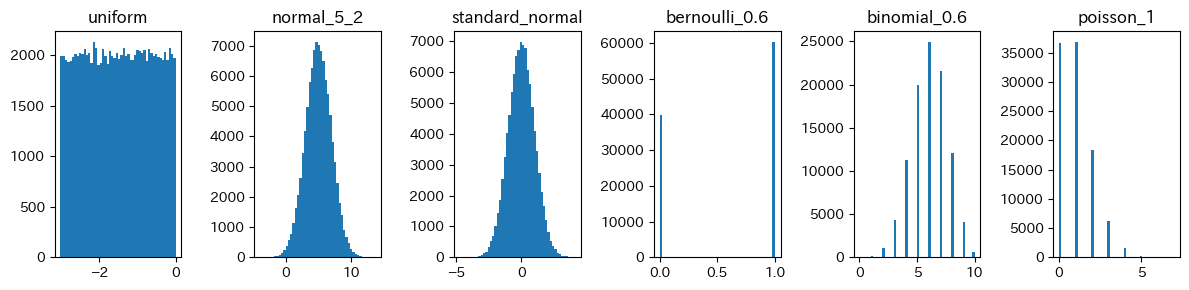

[-0.40604531 -1.37271864 -0.6809237   0.4597172  -0.77355463 -0.6348918
 -1.53079307 -1.58628246 -0.63770682 -0.40534461]


In [336]:
n = 100000
p = 0.6
lam = 1
# rng = np.random.default_rng()
dist_list = {
    'uniform': stats.uniform.rvs(-3, 3, size=n),
    f'normal_5_2': stats.norm.rvs(5, 2, size=n),
    'standard_normal': stats.norm.rvs(size=n),
    f'bernoulli_{p}': stats.bernoulli.rvs(p, size=n),
    f'binomial_{p}': stats.binom.rvs(10, p, size=n),
    f'poisson_{lam}': stats.poisson.rvs(lam, size=n),   
}

fig, axs = plt.subplots(1, 6, figsize=(12, 3))
for ax, (name, dist) in zip(axs, dist_list.items()):
    ax.hist(dist, bins=50)
    ax.set_title(f'{name}')
plt.tight_layout()
plt.show()

print(stats.norm.rvs(size=10))
# print(stats.bernoulli.rvs(0.2, size=10))

コイン投げシミュレーション

,0,1,2,3,4,5
count,315.0000,1541.0000,3150.000,3122.0000,1527.0000,345.0000
ratio,0.0315,0.1541,0.315,0.3122,0.1527,0.0345


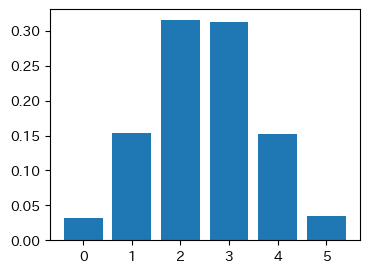

In [419]:
n, N, p = 5, 10000, 0.5
coin_test = stats.binom.rvs(n, p, size=N)
data = {
    'count': np.array([np.count_nonzero(coin_test == i) for i in range(n+1)]),
    'ratio': np.array([np.count_nonzero(coin_test == i) for i in range(n+1)]) / N,
}
df = pd.DataFrame(data).T
plt.figure(figsize=(4, 3))
plt.bar(df.columns, df.loc['ratio'])
df

大数の法則のシミュレーション

In [573]:
result = np.array([])
diff_array = np.array([])
for i in range(10000):
    dice_test = np.random.randint(low=1, high=7, size=i)
    count = np.count_nonzero(dice_test == 6)
    mean = count/(i+10**-7)
    diff = np.abs(mean - (1/6))
    result = np.append(result, mean)
    diff_array = np.append(diff_array, diff)


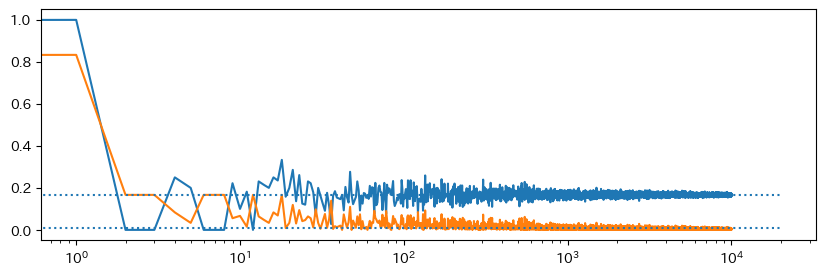

In [577]:

plt.figure(figsize=(10, 3))
plt.plot(result)
plt.plot(diff_array)
plt.hlines(1/6, xmin=0, xmax=20000, linestyles='dotted')
plt.hlines(0.01, xmin=0, xmax=20000, linestyles='dotted')
plt.xscale('log')
plt.show()